### Student Information
Name: 黃鼎峰

Student ID: 107034048

GitHub ID: DingFong

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# First part

# 1. Data Preparation

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# 2. Data Transformation

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Exercise 2

In [5]:
#Answer here
## query several features at the same time
print("Way 1")
selected_column = ["text", "category"]
print(X[selected_column])
print("="*80)

## query by the data of lable
print("Way 2")
print(X.loc[X["category"]==1][0:5])
print("="*80)

## 查詢通過特定條件的"category_name"欄位
print("Way 3")
print(X.loc[X["category"]==1,"category_name"][0:5])
print("="*80)

## 用 function查詢通過條件的特定欄位
print("Way 4")
print(X.loc[lambda X: X['category'] == 0, :])

Way 1
                                                   text  category
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3
...                                                 ...       ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2

[2257 rows x 2 columns]
Way 2
                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani

# 3. Data Mining using Pandas

# 3.1 Missing Value

# Exercise 5

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [8]:
# Answer here
##Because the method isnull() don't include "NaN"、"None", ""
NA_df["missing_example"].replace(["NaN", "None",""], np.nan).isnull()


0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

# 3.2 Dealing with Duplicate Data

# 4 Data Preprocessing

In [9]:
X_sample = X.sample(n=1000) #random state


# Exercise 6

In [10]:
# Answer here
#index變隨機、不按順序排列、只剩1000個data
print(X.tail(6))
print(len(X_sample))

                                                   text  category  \
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
2251       sci.med  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  
1000


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 7

soc.religion.christian    273
sci.med                   265
comp.graphics             253
alt.atheism               209
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

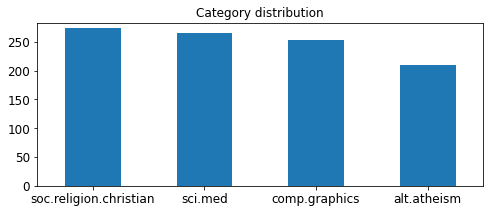

In [12]:
# Answer here
#透過記錄最高的次數，進而繪製出好看的長條圖
upper_bound = max(X_sample.category_name.value_counts())+10
# plot barchart for X_sample
print(X_sample.category_name.value_counts())
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

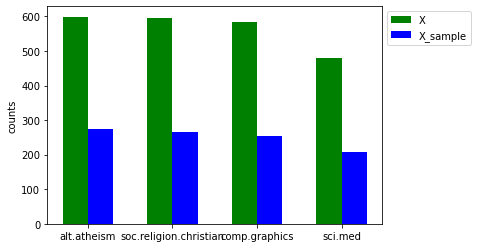

In [13]:
width=0.3
x = np.arange(len(categories))
plt.bar(x, X.category_name.value_counts(), width, color="green", label="X")
plt.bar(x+width, X_sample.category_name.value_counts(), width, color="blue", label='X_sample')
plt.xticks(x + width / 2, categories)
plt.ylabel("counts")
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

# 4.2 Feature Creation

In [14]:
import nltk

In [15]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

# 4.3 Feature subset selection

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Exercise 10

In [17]:
# Answer here
position = 0
for term in X_counts[4, 0:100].toarray()[0]:
    if term == 1:
        print(position)
        position = position + 1
    else:
        position = position + 1

0
37


# Exercise 11 

In [18]:
# Answer here
import seaborn as sns

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_clip = term_frequencies
term_frequencies_filter = term_frequencies_clip >= 1000
term_frequencies_clip = term_frequencies_clip[term_frequencies_filter]


indexs=[]
for idx, value in enumerate(term_frequencies_filter):
    if value==True:
        indexs.append(idx)

names = []
for idx in indexs:
    names.append(count_vect.get_feature_names()[idx])
    
print(indexs)

[3958, 4720, 4808, 4938, 4992, 5195, 5410, 5529, 5549, 5698, 6298, 6358, 7480, 7505, 7766, 9072, 12014, 12051, 12096, 12626, 14601, 14887, 15521, 16216, 16254, 16302, 16642, 16908, 17268, 17556, 18474, 18551, 19076, 19458, 20198, 20253, 21322, 22215, 22541, 23123, 23250, 23610, 23733, 23741, 23757, 23870, 23915, 24020, 24052, 24784, 27031, 30068, 30173, 31077, 32131, 32139, 32142, 32152, 32202, 32233, 32253, 32270, 32493, 33597, 34703, 34775, 34879, 34923, 34935, 34954, 34982, 35057, 35157, 35312, 35350, 35638, 35648]


In [19]:
z_matrix = []
for i in range(20):
    docu_freq = []
    for idx in indexs:
        docu_freq.append(X_counts[i, idx])
    z_matrix.append(docu_freq)
plot_z = z_matrix
plot_x = []
for n in names:
    plot_x.append("term_"+ str(n))
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

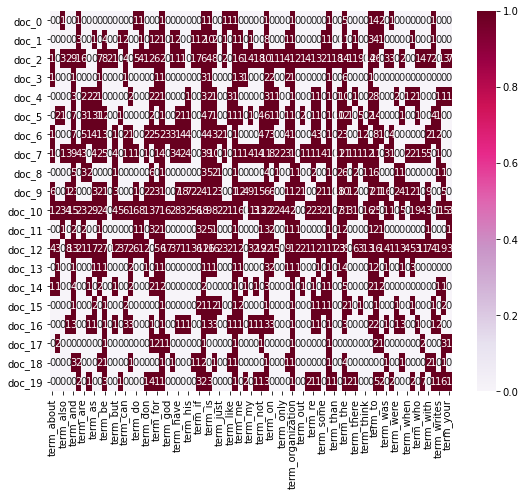

In [20]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# 4.4 Dimensionality Reduction

# Exercise 12

<ipython-input-21-0191053f8fbd>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(-200.0, 0, ''),
 Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, '')]

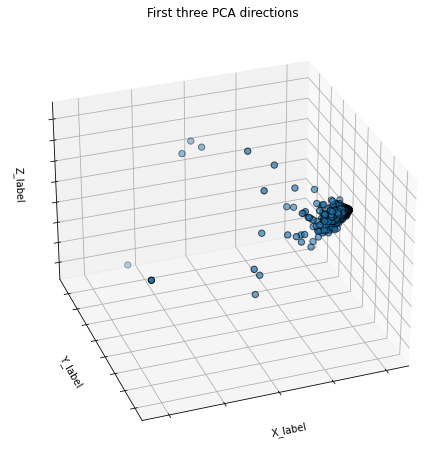

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

#col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced_toThree = PCA(n_components = 3).fit_transform(X_counts.toarray())

ax.scatter(X_reduced_toThree[:, 0], X_reduced_toThree[:, 1], X_reduced_toThree[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

<ipython-input-22-6859678acba7>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(-200.0, 0, ''),
 Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, '')]

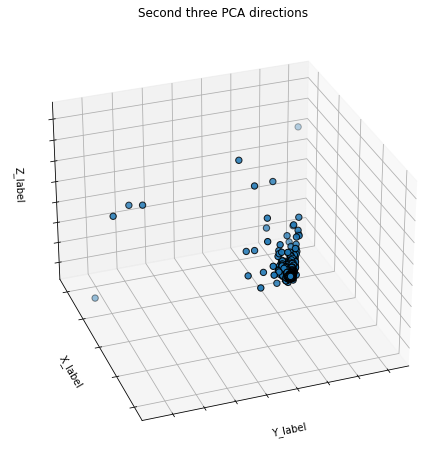

In [22]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced_toThree[:, 1], X_reduced_toThree[:, 0], X_reduced_toThree[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Second three PCA directions")
ax.set_xlabel("Y_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("X_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

<ipython-input-23-18ea03869aaf>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(-200.0, 0, ''),
 Text(-150.0, 0, ''),
 Text(-100.0, 0, ''),
 Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, '')]

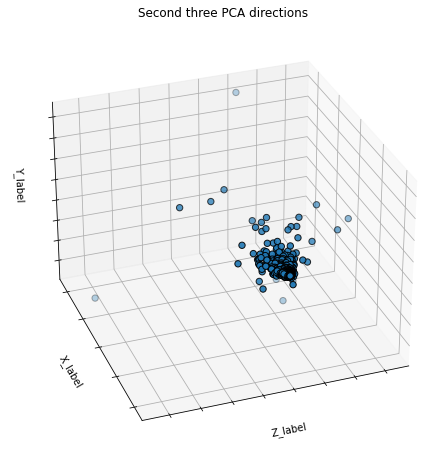

In [23]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced_toThree[:, 2], X_reduced_toThree[:, 0], X_reduced_toThree[:, 1],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Second three PCA directions")
ax.set_xlabel("Z_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("X_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Y_label")
ax.w_zaxis.set_ticklabels([])

In [24]:
# what I found?????
# Ans: 1. 有很明顯的集中趨勢 2. 集中在Ｘ、Ｙ、Ｚ都較大的區域

# 4.5 Atrribute Transformation / Aggregation

# Exercise 13

In [25]:
# Answer here
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
fig = px.histogram(X, x="category_name")
fig.show()

# Exercise 14

In [26]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_clip = term_frequencies

In [27]:
term_frequencies_filter = term_frequencies_clip >= 300
term_frequencies_clip = term_frequencies_clip[term_frequencies_filter]
len(term_frequencies_clip)

260

In [28]:
indexs=[]
for idx, value in enumerate(term_frequencies_filter):
    if value==True:
        indexs.append(idx)

names = []
for idx in indexs:
    names.append(count_vect.get_feature_names()[idx])

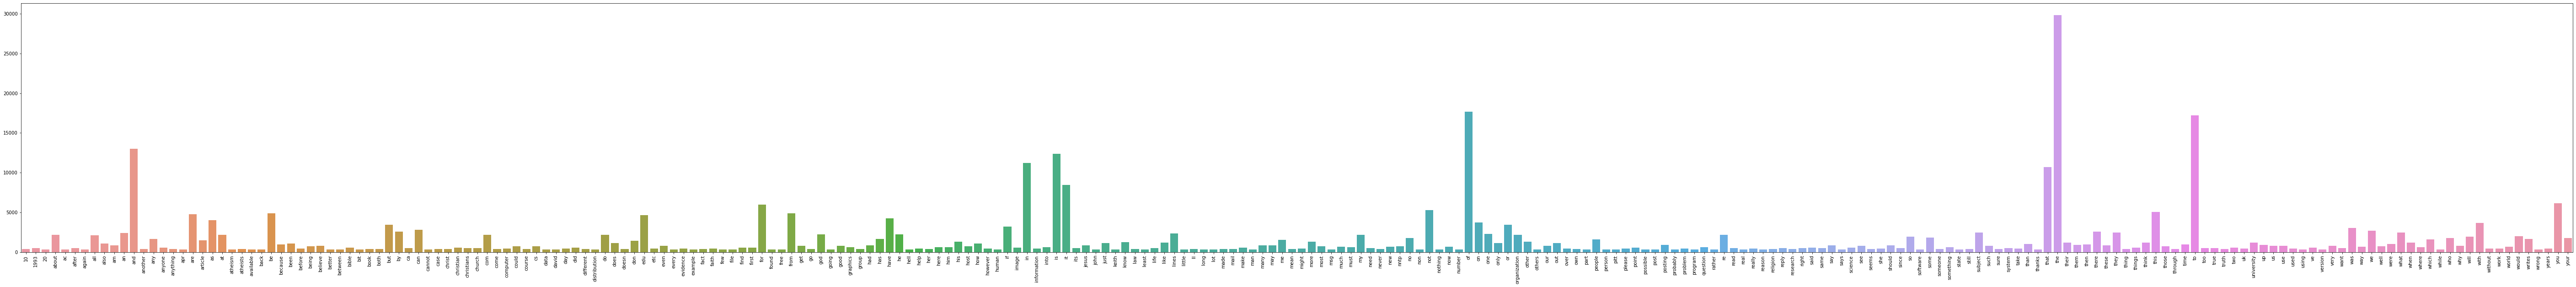

In [29]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=names, 
            y=term_frequencies_clip)
g.set_xticklabels(names, rotation = 90);

# Exercise 15

In [30]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_clip = term_frequencies
term_frequencies_filter = term_frequencies_clip >= 300
term_frequencies_clip = term_frequencies_clip[term_frequencies_filter]

indexs=[]
for idx, value in enumerate(term_frequencies_filter):
    if value==True:
        indexs.append(idx)

In [31]:
term_frequencies_decending = abs(np.sort(-term_frequencies_clip))
#print(indexs)

index_decending = np.argsort(-term_frequencies_clip)
#print(index_decending)
#print(term_frequencies_decending)
names = [] 
for idx in index_decending:
    names.append(count_vect.get_feature_names()[indexs[idx]])
print(names)

['the', 'of', 'to', 'and', 'is', 'in', 'that', 'it', 'you', 'for', 'not', 'this', 'be', 'from', 'are', 'edu', 'have', 'as', 'on', 'with', 'but', 'or', 'if', 'was', 'can', 'we', 'there', 'by', 'what', 'subject', 'they', 'an', 'lines', 'one', 'he', 'god', 'do', 'organization', 'at', 're', 'com', 'about', 'my', 'all', 'would', 'will', 'so', 'some', 'your', 'no', 'who', 'has', 'any', 'writes', 'people', 'which', 'me', 'article', 'don', 'his', 'more', 'other', 'know', 'when', 'think', 'their', 'like', 'university', 'does', 'out', 'just', 'only', 'how', 'also', 'been', 'than', 'were', 'then', 'time', 'because', 'them', 'posting', 'up', 'had', 'am', 'should', 'these', 'may', 'many', 'say', 'jesus', 'see', 'why', 'us', 'get', 'very', 'good', 'believe', 'use', 'such', 'even', 'our', 'could', 'well', 'host', 'most', 'cs', 'those', 'being', 'nntp', 'way', 'new', 'world', 'much', 'now', 'into', 'here', 'graphics', 'question', 'something', 'him', 'must', 'where', 'things', 'image', 've', 'science',

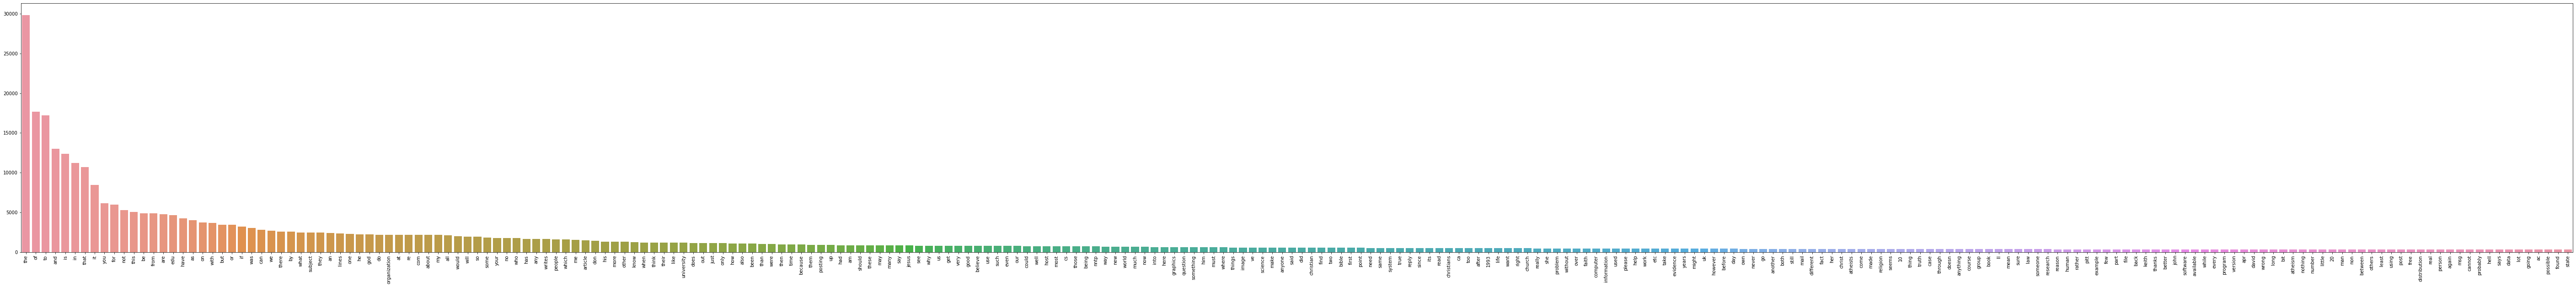

In [32]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=names, 
            y=term_frequencies_decending)
g.set_xticklabels(names, rotation = 90);

# 4.6 Discretization and Binarization

In [33]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [34]:
mlb = preprocessing.LabelBinarizer()

In [35]:
mlb.fit(X.category)

LabelBinarizer()

In [36]:
X['bin_category'] = mlb.transform(X['category']).tolist()

#  Exercise 16

In [37]:
# Answer here
mlb.fit(X.category_name)
print(mlb.classes_)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

# Second part

# 1. Data preparation

In [38]:
import pandas as pd
data_ama = "data/sentiment labelled sentences/amazon_cells_labelled.txt"
data_imdb ="data/sentiment labelled sentences/imdb_labelled.txt"
data_yelp ="data/sentiment labelled sentences/yelp_labelled.txt"

train_ama = pd.read_table(data_ama, header = None)
train_imdb = pd.read_table(data_imdb, header = None)
train_yelp = pd.read_table(data_yelp, header = None)

train_ama.columns = train_imdb.columns = train_yelp.columns = ["text", "label"]

In [39]:
train_ama.text[0:2]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
Name: text, dtype: object

In [40]:
train_ama.label

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

In [41]:
print(f"len of train_ama: {len(train_ama)}")
print(f"len of train_imdb: {len(train_imdb)}")
print(f"len of train_yelp: {len(train_yelp)}")

len of train_ama: 1000
len of train_imdb: 748
len of train_yelp: 1000


In [42]:
from sklearn.utils import shuffle


df_train = pd.concat([train_ama, train_imdb, train_yelp],axis=0, ignore_index=True)
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

text  label
0     I am a fan of his ... This movie sucked really...      0
1     People couldnt hear me talk and I had to pull ...      0
2     Overall I was not impressed and would not go b...      0
3     Similarly, the delivery man did not say a word...      0
4     If you hate earbugs, avoid this phone by all m...      0
...                                                 ...    ...
2743  The screen does get smudged easily because it ...      0
2744  It was an inexpensive piece, but I would still...      0
2745  After all the rave reviews I couldn't wait to ...      0
2746               This one works and was priced right.      1
2747  This is a VERY average phone with bad battery ...      0

[2748 rows x 2 columns]

# 2. data mining

# 2.1 Missing Value

In [43]:
import helpers.data_mining_helpers as dmh
df_train.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

# 2.2 duplicate


In [44]:
sum(df_train.duplicated("text"))

17

In [45]:
len(df_train)

2748

In [46]:
df_train[df_train.duplicated("text")]

text  label
802                    Definitely worth checking out.        1
993                               This is a great deal.      1
1208                                            10/10        1
1233                                      Great phone!.      1
1343                                       Great phone.      1
1632                            Don't buy this product.      0
1707                  I would not recommend this place.      0
1816  If you like a loud buzzing to override all you...      0
1855                   Excellent product for the price.      1
1879                                 I love this place.      1
2285                                       Great Phone.      1
2355                             The food was terrible.      0
2370                                 Not recommended.        0
2465                                       Works great.      1
2475                                   I won't be back.      0
2637                                      Does not fit.      0
2671                                      Works great!.      1

In [47]:
df_train.drop_duplicates(keep="first", inplace=True)

In [48]:
len(df_train)

2731

# 3. Data Preprocessing

# 3.1 sampling 

In [49]:
df_train_sample = df_train.sample(500)
len(df_train_sample)
df_train_sample[0:4]

text  label
825   The waitress was friendly and happy to accomod...      1
1277  We've have gotten a much better service from t...      0
1757  (My mother and brother had to do this)When I s...      1
2523  This greedy corporation will NEVER see another...      0

1    1376
0    1355
Name: label, dtype: int64


<AxesSubplot:title={'center':'label distribution'}>

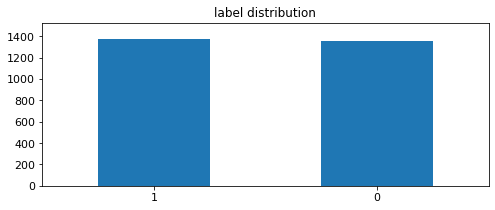

In [50]:
print(df_train.label.value_counts())

upperbound = max(df_train.label.value_counts()) +150

df_train.label.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, upperbound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

# 3.2 Feature creation 

In [51]:
import nltk

In [52]:
df_train['unigrams'] = df_train['text'].apply(lambda x: dmh.tokenize_text(x))

In [53]:
df_train[0:4]["unigrams"]

0    [I, am, a, fan, of, his, ..., This, movie, suc...
1    [People, couldnt, hear, me, talk, and, I, had,...
2    [Overall, I, was, not, impressed, and, would, ...
3    [Similarly, ,, the, delivery, man, did, not, s...
Name: unigrams, dtype: object

In [54]:
df_train[0:4]

text  label  \
0  I am a fan of his ... This movie sucked really...      0   
1  People couldnt hear me talk and I had to pull ...      0   
2  Overall I was not impressed and would not go b...      0   
3  Similarly, the delivery man did not say a word...      0   

                                            unigrams  
0  [I, am, a, fan, of, his, ..., This, movie, suc...  
1  [People, couldnt, hear, me, talk, and, I, had,...  
2  [Overall, I, was, not, impressed, and, would, ...  
3  [Similarly, ,, the, delivery, man, did, not, s...

In [55]:
list(df_train[0:1]["unigrams"])

[['I',
  'am',
  'a',
  'fan',
  'of',
  'his',
  '...',
  'This',
  'movie',
  'sucked',
  'really',
  'bad',
  '.']]

# 3.3 Feature subset selection

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_train.text)
df_counts.shape

(2731, 5155)

In [57]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [58]:
df_counts[0:3,0:120].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
position = 0
for term in df_counts[1, 0:5155].toarray()[0]:
    if term == 1:
        print(position)
        position = position + 1
    else:
        position = position + 1
print(position)

1042
1449
2067
2130
2809
3122
3166
3290
3322
3537
4609
5155


In [60]:
count_vect.get_feature_names()[107]

'accused'

In [61]:
df_train["text"][1]

'People couldnt hear me talk and I had to pull out the earphone and talk on the phone.'

In [62]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [63]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [64]:
plot_y = ["doc_"+ str(i) for i in list(df_train.index)[0:20]]

In [65]:
plot_z = df_counts[0:20, 0:20].toarray()

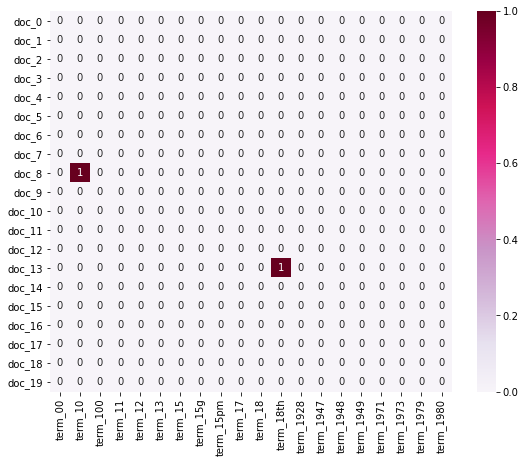

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# 3.4 Dimensionality Reduction

In [67]:
from sklearn.decomposition import PCA

In [68]:
df_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [70]:
df_reduced.shape

(2731, 2)

In [71]:
df_counts.shape

(2731, 5155)

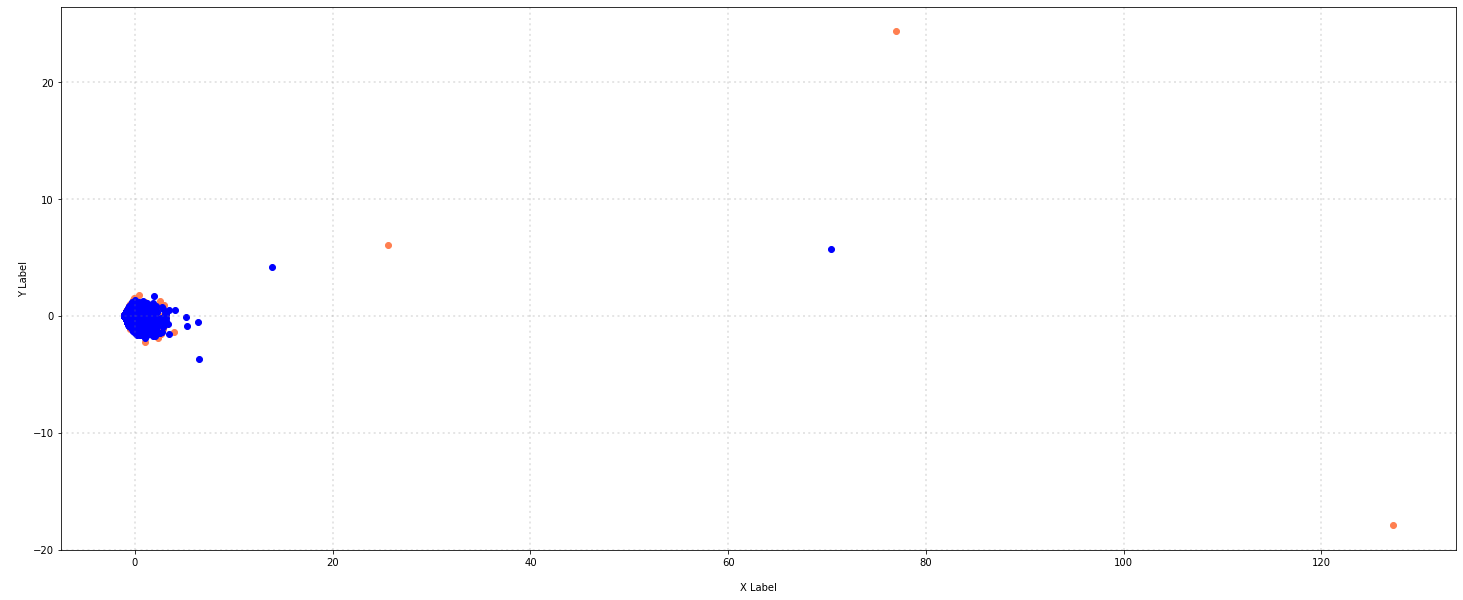

In [72]:
col = ['coral', 'blue', 'black', 'm']
labels = [0, 1]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = df_reduced[df_train['label'] == label].T[0]
    ys = df_reduced[df_train['label'] == label].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

<ipython-input-73-a7485474c457>:5: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



[Text(-8.0, 0, ''),
 Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

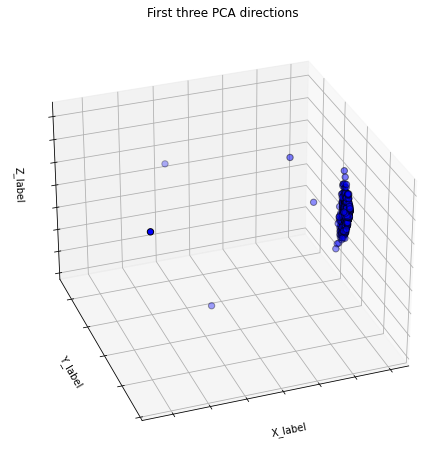

In [73]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
df_reduced_toThree = PCA(n_components = 3).fit_transform(df_counts.toarray())

ax.scatter(df_reduced_toThree[:, 0], df_reduced_toThree[:, 1], df_reduced_toThree[:, 2], c=c,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X_label")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y_label")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z_label")
ax.w_zaxis.set_ticklabels([])

# 3.5 Attribute Transformation/ Aggregation

In [74]:
import numpy as np
term_frequencies = []
print(df_counts[:, 1])
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

  (8, 0)	1
  (78, 0)	2
  (204, 0)	1
  (255, 0)	1
  (287, 0)	1
  (453, 0)	2
  (636, 0)	3
  (678, 0)	1
  (697, 0)	2
  (758, 0)	1
  (948, 0)	1
  (952, 0)	2
  (968, 0)	1
  (976, 0)	1
  (1004, 0)	1
  (1187, 0)	1
  (1555, 0)	2
  (1649, 0)	1
  (1699, 0)	1
  (1803, 0)	2
  (1842, 0)	1
  (2217, 0)	1
  (2283, 0)	1
  (2323, 0)	1
  (2350, 0)	1
  (2356, 0)	1
  (2474, 0)	1
  (2488, 0)	1


In [75]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [76]:
term_frequencies[0]

1

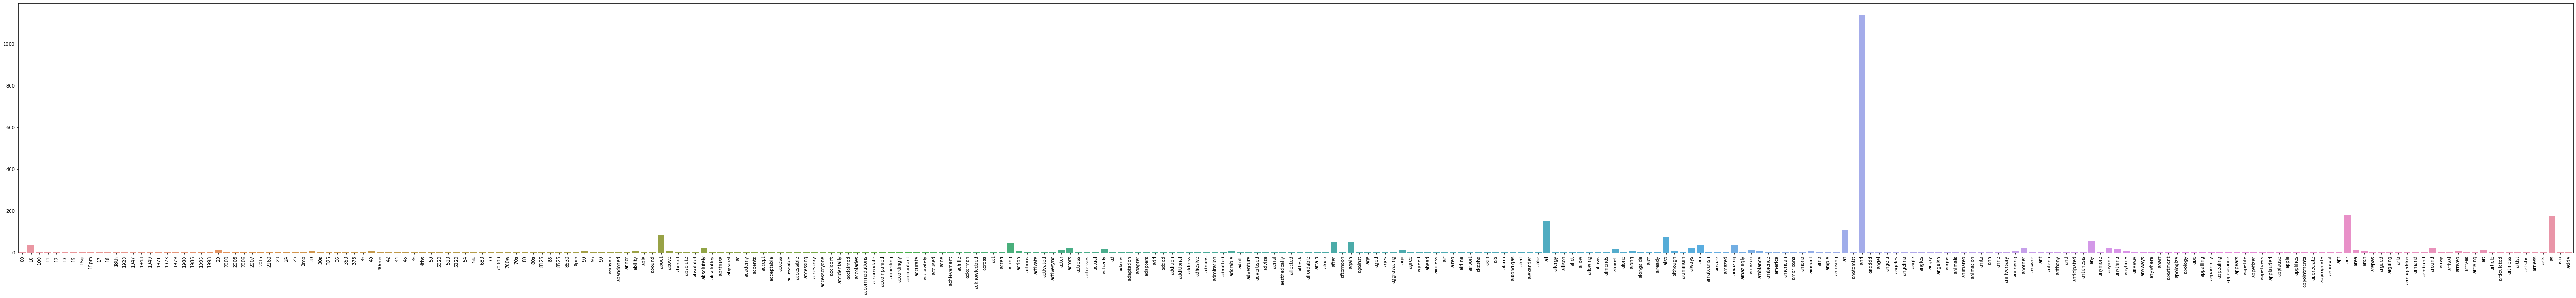

In [77]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [78]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies_clip = term_frequencies[0:300]

In [79]:
term_frequencies_filter = term_frequencies_clip >= 10
term_frequencies_clip = term_frequencies_clip[term_frequencies_filter]
len(term_frequencies_clip)

26

In [80]:
indexs=[]
for idx, value in enumerate(term_frequencies_filter):
    if value==True:
        indexs.append(idx)

names = []
for idx in indexs:
    names.append(count_vect.get_feature_names()[idx])
term_frequencies_clip

array([  36,   85,   21,   43,   10,   19,   16,   52,   49,  149,   14,
         74,   24,   35,   34,  106, 1138,   22,   53,   23,   15,  180,
         10,   21,   13,  175], dtype=int64)

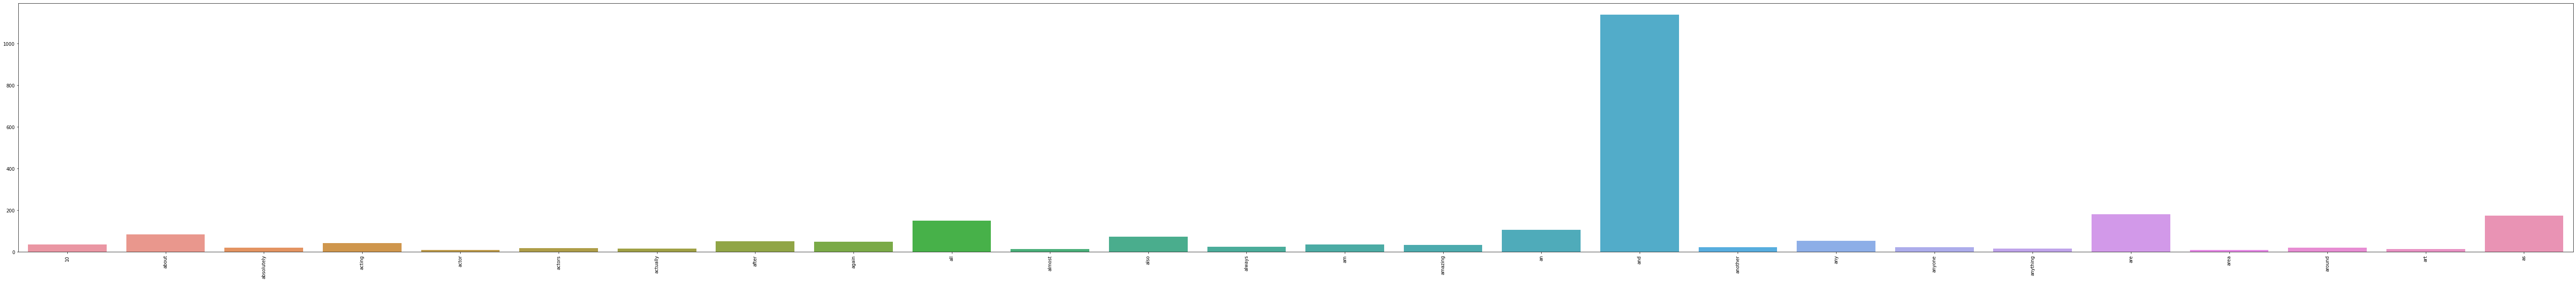

In [81]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=names, 
            y=term_frequencies_clip)
g.set_xticklabels(names, rotation = 90);

In [82]:
# Answer here
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies_clip = term_frequencies[0:300]

term_frequencies_decending = abs(np.sort(-term_frequencies_clip))
index_decending = np.argsort(-term_frequencies_clip)
names = []
for i in index_decending:
    names.append(count_vect.get_feature_names()[i])

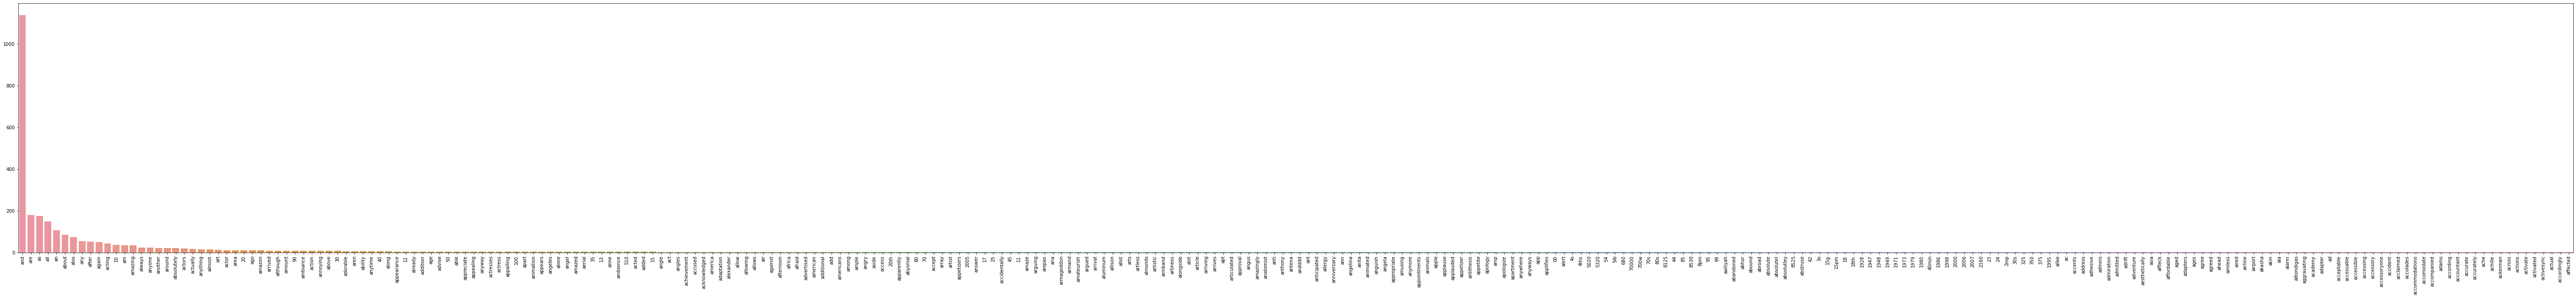

In [83]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=names, 
            y=term_frequencies_decending)
g.set_xticklabels(names, rotation = 90);

In [84]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

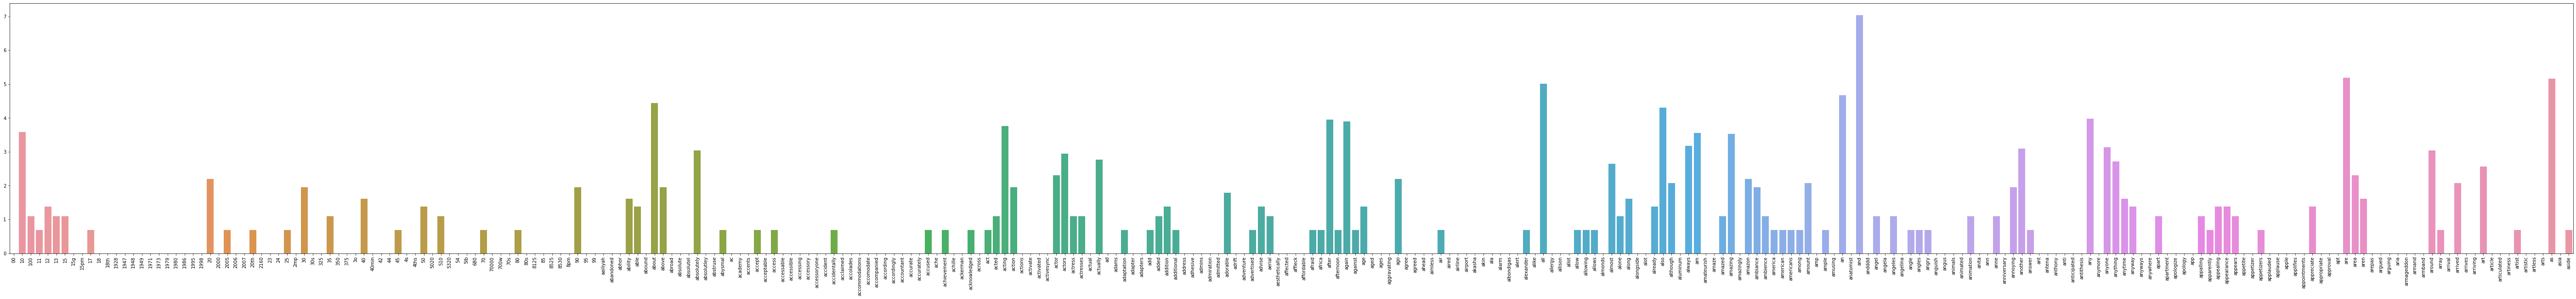

In [85]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

# 3.6 Discretization and Binarization

In [86]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [87]:
mlb = preprocessing.LabelBinarizer()

In [88]:
labels=[0,1]
mlb.fit(df_train["label"])

LabelBinarizer()

In [89]:
mlb.classes_

array([0, 1], dtype=int64)

In [90]:
df_train['bin_label'] = mlb.transform(df_train['label']).tolist()

In [91]:
df_train[0:9]

text  label  \
0  I am a fan of his ... This movie sucked really...      0   
1  People couldnt hear me talk and I had to pull ...      0   
2  Overall I was not impressed and would not go b...      0   
3  Similarly, the delivery man did not say a word...      0   
4  If you hate earbugs, avoid this phone by all m...      0   
5  Fits comfortably, came with three sizes of ear...      1   
6  I have yet to run this new battery below two b...      1   
7  It was a pale color instead of nice and char a...      0   
8  Ordered an appetizer and took 40 minutes and t...      0   

                                            unigrams bin_label  
0  [I, am, a, fan, of, his, ..., This, movie, suc...       [0]  
1  [People, couldnt, hear, me, talk, and, I, had,...       [0]  
2  [Overall, I, was, not, impressed, and, would, ...       [0]  
3  [Similarly, ,, the, delivery, man, did, not, s...       [0]  
4  [If, you, hate, earbugs, ,, avoid, this, phone...       [0]  
5  [Fits, comfortably, ,, came, with, three, size...       [1]  
6  [I, have, yet, to, run, this, new, battery, be...       [1]  
7  [It, was, a, pale, color, instead, of, nice, a...       [0]  
8  [Ordered, an, appetizer, and, took, 40, minute...       [0]

# 4. Data Exploration

In [92]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df_train.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_train.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_train.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [93]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The death row scenes were entirely unmoving.  ']
['All the actors give a wonderful performance, especially Jennifer Rubin as Jamie Harris, who changes from the nervous starlet in the beginning through the strange events she is part of to the cool star.  ']
["Yes it's shiny on front side - and I love it!"]


In [94]:
from sklearn.preprocessing import binarize
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [95]:
from sklearn.metrics.pairwise import cosine_similarity


cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)


print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.259587
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000



# Third part

In [96]:
def transfer_to_length(row):
    return len(row["unigrams"])
df_train["length"] = df_train.apply(transfer_to_length, axis = 1)

In [97]:
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px

df_train_bad = df_train[df_train["label"]==0]
df_train_good = df_train[df_train["label"]==1]
fig = px.histogram(df_train_bad, x='length', template='plotly_white', title='Complain counts by length')
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of bad labels')
fig.show()


In [98]:
fig = px.histogram(df_train_good, x='length', template='plotly_white', title='Complain counts by length')
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of good labels')
fig.show()

In [99]:
df_counts_bad = count_vect.fit_transform(df_train.loc[df_train["label"]==0, "text"])

term_frequencies = np.asarray(df_counts_bad.sum(axis=0))[0]
term_frequencies_clip = term_frequencies
term_frequencies_filter = term_frequencies_clip >= 100
term_frequencies_clip = term_frequencies_clip[term_frequencies_filter]

indexs=[]
for idx, value in enumerate(term_frequencies_filter):
    if value==True:
        indexs.append(idx)

len(term_frequencies_clip)

18

In [100]:
term_frequencies_decending = abs(np.sort(-term_frequencies_clip))
#print(indexs)

index_decending = np.argsort(-term_frequencies_clip)
#print(index_decending)
#print(term_frequencies_decending)
names = [] 
for idx in index_decending:
    names.append(count_vect.get_feature_names()[indexs[idx]])
print(names)

['the', 'and', 'it', 'to', 'is', 'of', 'this', 'was', 'not', 'in', 'that', 'for', 'my', 'with', 'but', 'you', 'on', 'very']


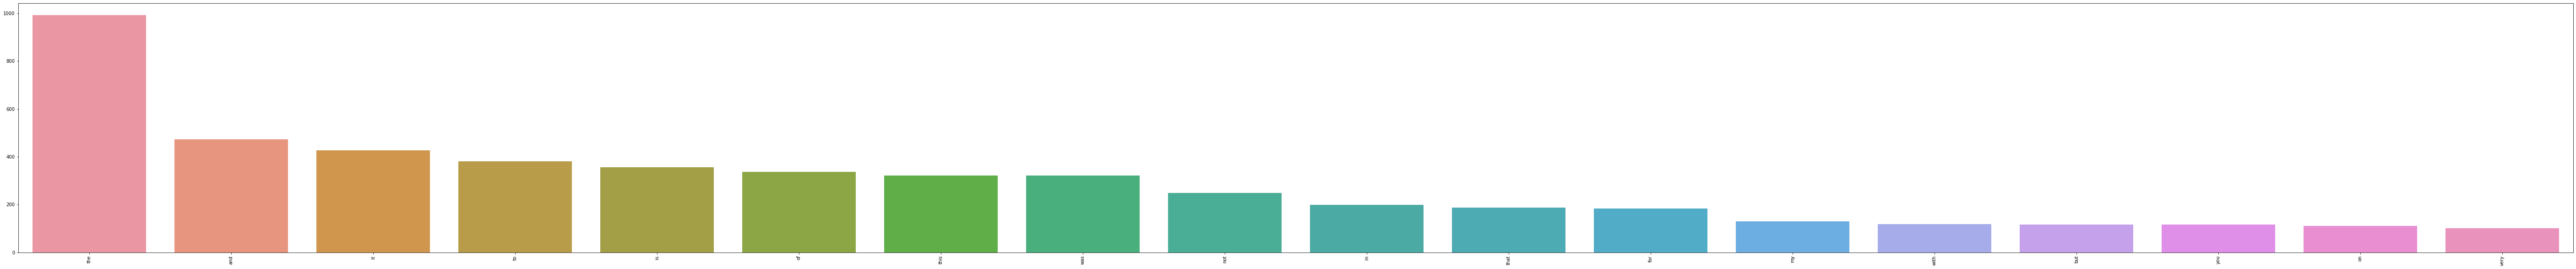

In [101]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=names, 
            y=term_frequencies_decending)
g.set_xticklabels(names, rotation = 90);

In [102]:
df_counts_good = count_vect.fit_transform(df_train.loc[df_train["label"]==1, "text"])
term_frequencies = np.asarray(df_counts_good.sum(axis=0))[0]
term_frequencies_clip = term_frequencies
term_frequencies_filter = term_frequencies_clip >= 100
term_frequencies_clip = term_frequencies_clip[term_frequencies_filter]

indexs=[]
for idx, value in enumerate(term_frequencies_filter):
    if value==True:
        indexs.append(idx)

len(term_frequencies_clip)

18

In [103]:
term_frequencies_decending = abs(np.sort(-term_frequencies_clip))
#print(indexs)

index_decending = np.argsort(-term_frequencies_clip)
#print(index_decending)
#print(term_frequencies_decending)
names = [] 
for idx in index_decending:
    names.append(count_vect.get_feature_names()[indexs[idx]])
print(names)

['the', 'and', 'is', 'it', 'this', 'to', 'of', 'was', 'in', 'great', 'good', 'with', 'for', 'very', 'that', 'my', 'on', 'you']


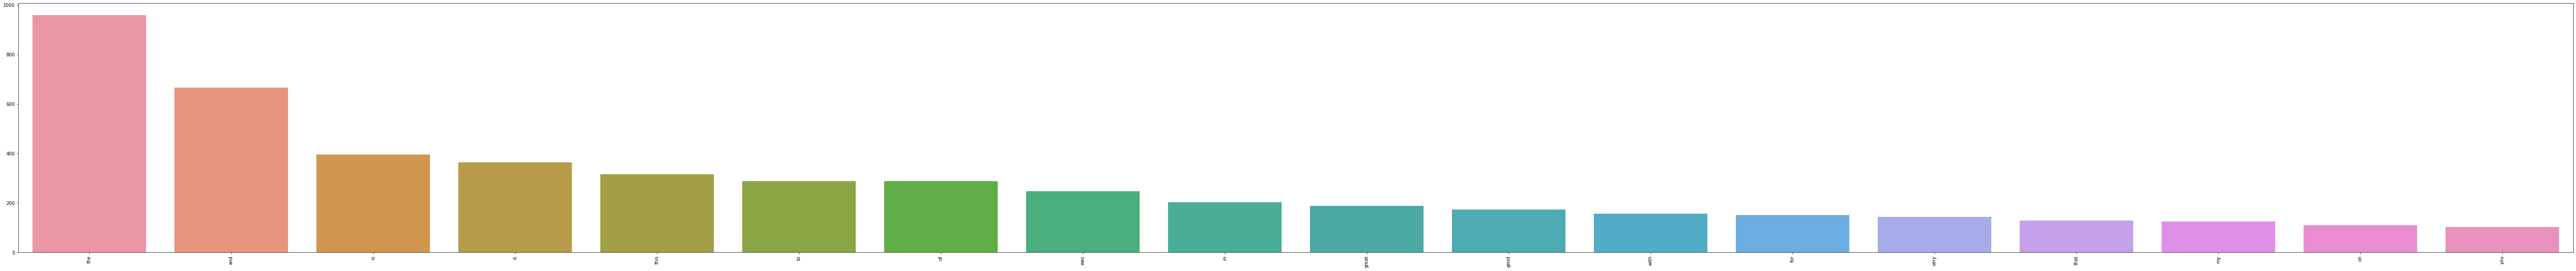

In [104]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=names, 
            y=term_frequencies_decending)
g.set_xticklabels(names, rotation = 90);

# TF-IDF

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True)
TFIDF = vectorizer.fit_transform(df_train["text"])

TF_IDF_result = pd.DataFrame(TFIDF.toarray(), columns = vectorizer.get_feature_names())
print(TF_IDF_result)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2726  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2727  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2728  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


# Naive Bayes classifier

In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# TF-IDF features to NB

In [107]:
TF_IDF_result["label"] = df_train["label"]
TF_IDF_result["label"] =TF_IDF_result["label"].fillna(0).astype("int") 
TF_IDF_result

00   10  100   11   12   13   15  15g  15pm   17  ...  yukon  yum  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...  ...   
2726  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2727  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2728  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2729  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   
2730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0  0.0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  label  
0       0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
1       0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
2       0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
3       0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
4       0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
...     ...  ...    ...   ...      ...     ...      ...    ...  
2726    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
2727    0.0  0.0    0.0   0.0      0.0     0.0      0.0      1  
2728    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
2729    0.0  0.0    0.0   0.0      0.0     0.0      0.0      0  
2730    0.0  0.0    0.0   0.0      0.0     0.0      0.0      1  

[2731 rows x 5156 columns]

In [108]:
train_data, test_data = train_test_split(TF_IDF_result, random_state=777, train_size=0.9)
X_train = train_data.iloc[:, :-1]
y_train = train_data.loc[:, "label"]

X_test = test_data.iloc[:, :-1]
y_test = test_data.loc[:, "label"]

model = GaussianNB()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
n = (y_test == y_test_predict).sum()      
acc = n / y_test_predict.size
print(y_test_predict)
print('Accuracy score: {:.2f}%'.format(acc * 100))

[1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0]
Accuracy score: 49.64%


# word frequency features to NB

In [109]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_train.text)

##WFF(word frequency features)
WFF_result = pd.DataFrame(df_counts.toarray(), columns = count_vect.get_feature_names())
WFF_result

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2726   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2727   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2728   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2729   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2730   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2726      0    0      0     0        0       0        0  
2727      0    0      0     0        0       0        0  
2728      0    0      0     0        0       0        0  
2729      0    0      0     0        0       0        0  
2730      0    0      0     0        0       0        0  

[2731 rows x 5155 columns]

In [110]:
WFF_result["label"] = df_train["label"]
WFF_result["label"] =WFF_result["label"].fillna(0).astype("int") 
WFF_result

00  10  100  11  12  13  15  15g  15pm  17  ...  yukon  yum  yummy  yun  \
0      0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...  ...    ...  ...   
2726   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2727   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2728   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2729   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   
2730   0   0    0   0   0   0   0    0     0   0  ...      0    0      0    0   

      z500a  zero  zillion  zombie  zombiez  label  
0         0     0        0       0        0      0  
1         0     0        0       0        0      0  
2         0     0        0       0        0      0  
3         0     0        0       0        0      0  
4         0     0        0       0        0      0  
...     ...   ...      ...     ...      ...    ...  
2726      0     0        0       0        0      0  
2727      0     0        0       0        0      1  
2728      0     0        0       0        0      0  
2729      0     0        0       0        0      0  
2730      0     0        0       0        0      1  

[2731 rows x 5156 columns]

In [111]:
train_data, test_data = train_test_split(WFF_result, random_state=777, train_size=0.9)
X_train = train_data.iloc[:, :-1]
y_train = train_data.loc[:, "label"]

X_test = test_data.iloc[:, :-1]
y_test = test_data.loc[:, "label"]

model = GaussianNB()
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
n = (y_test == y_test_predict).sum()      
acc = n / y_test_predict.size
print(y_test_predict)
print('Accuracy score: {:.2f}%'.format(acc * 100))

[1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Accuracy score: 47.45%


# Comparison

In [112]:
# 驗證集去比較兩個的準確率，TF-IDF跑出來的準確率較高
# TF-IDF在原理上，如果某個詞或短語在一篇文章中出現的頻率高，並且在其他文章中很少出現，則認為此詞或者短語具有很好的類別區分能力，所以比起普通的頻率會更適合來做分類任務。

# Fourth part

In [113]:
# 1. 繪製heatmap時，大多數的向量頻率為0，全部印出來很沒有效率 --> 透過挑選頻率高的作為heatmap的x軸
# 2. 繪製從高頻道低頻的長條圖，不要將所有的向量印出來，會很沒效率 --> 設門檻值讓一定頻率水準的向量呈現就好
